In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as sc
import os as os
from matplotlib.patches import Rectangle

from numpy.linalg import norm
from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

icefire = cm.get_cmap('icefire')
cools = cm.get_cmap('cool_r')
from scipy import ndimage

from scipy.stats import t
from matplotlib.collections import LineCollection

In [3]:
def spearman(dfof, ratio, stat = True):
    if stat:
        return sc.spearmanr(dfof, ratio)[0]
    else:
        return sc.spearmanr(dfof, ratio)[1]

def critical_r(n, alpha=0.05, tail='two-sided'):
    df = n - 2
    if tail == 'two-sided':
        t_crit = t.ppf(1 - alpha/2, df)
    elif tail == 'one-sided':
        t_crit = t.ppf(1 - alpha, df)
    else:
        raise ValueError("tail must be 'one-sided' or 'two-sided'")
    
    r_crit = t_crit / np.sqrt(t_crit**2 + df)
    return r_crit

In [4]:
def colored_line(x, y, c, ax, **lc_kwargs):
    """
    From matplotlib's documentation
    """

    
    if "array" in lc_kwargs:
        warnings.warn('The provided "array" keyword argument will be overridden')

    default_kwargs = {"capstyle": "butt"}
    default_kwargs.update(lc_kwargs)

    x = np.asarray(x)
    y = np.asarray(y)
    x_midpts = np.hstack((x[0], 0.5 * (x[1:] + x[:-1]), x[-1]))
    y_midpts = np.hstack((y[0], 0.5 * (y[1:] + y[:-1]), y[-1]))

    coord_start = np.column_stack((x_midpts[:-1], y_midpts[:-1]))[:, np.newaxis, :]
    coord_mid = np.column_stack((x, y))[:, np.newaxis, :]
    coord_end = np.column_stack((x_midpts[1:], y_midpts[1:]))[:, np.newaxis, :]
    segments = np.concatenate((coord_start, coord_mid, coord_end), axis=1)

    lc = LineCollection(segments, **default_kwargs)
    lc.set_array(c)  # set the colors of each segment

    return ax.add_collection(lc)

In [5]:


op = 10
Brightness = (
    [[1,0,0]]*177 +
    [[0.75,0,0]]*(3+op) + #dark flash
    [[1,0,0]]*(235-179-op) +
    [[0.5,0,0]]*(3+op) + #dark flash
    [[1,0,0]]*(294-238-op) +
    [[0.25,0,0]]*(3+op) + #dark flash
    [[1,0,0]]*(352-296-op) +
    [[0,0,0]]*(3+op) + #dark flash
    [[1,0,0]]*(410-355-op) +
    [[0,0,0]]*(466-410) + #long dark flash
    [[0.25,0,0]]*(3+op) + #bright flash
    [[0,0,0]]*(524-469-op) + 
    [[0.5,0,0]]*(3+op) + #bright flash
    [[0,0,0]]*(583-527-op) + 
    [[0.75,0,0]]*(3+op) + #bright flash
    [[0,0,0]]*(641-586-op) + 
    [[1,0,0]]*(3+op) + #bright flash
    [[0,0,0]]*(700-644-op) +
    [[1,0,0]]*(783-700) + #loongbright flash
    [[0.5,0,0]]*653 +
    [[0,0,0]]*(1800-1438)
)

color_moving = [0,0.6,0.6]
Brightness[839:853] = [color_moving ]*(853-839)
Brightness[908:922] = [color_moving ]*(922-908)
Brightness[978:992] = [color_moving ]*(992-978)
Brightness[1047:1061] = [color_moving ]*(1061-1047)

Brightness[1117:1131] = [color_moving ]*(1131-1117)
Brightness[1186:1200] = [color_moving ]*(1200-1186)
Brightness[1256:1269] = [color_moving ]*(1269-1256)
Brightness[1325:1339] = [color_moving ]*(1339-1325)

stim_starts = [
    177, 235, 295, 352, 410,
    466, 524,583, 641,700,783,
    839,908,978,1047,1117,1186,1256,1325,1438
]

In [6]:
All_traces_merged = pd.read_csv("../Data/All_SIN_traces_All_fish.csv")

allData_merged = pd.read_csv("../Data/All_SIN_data_All_fish.csv")

(0.1, 0.6)


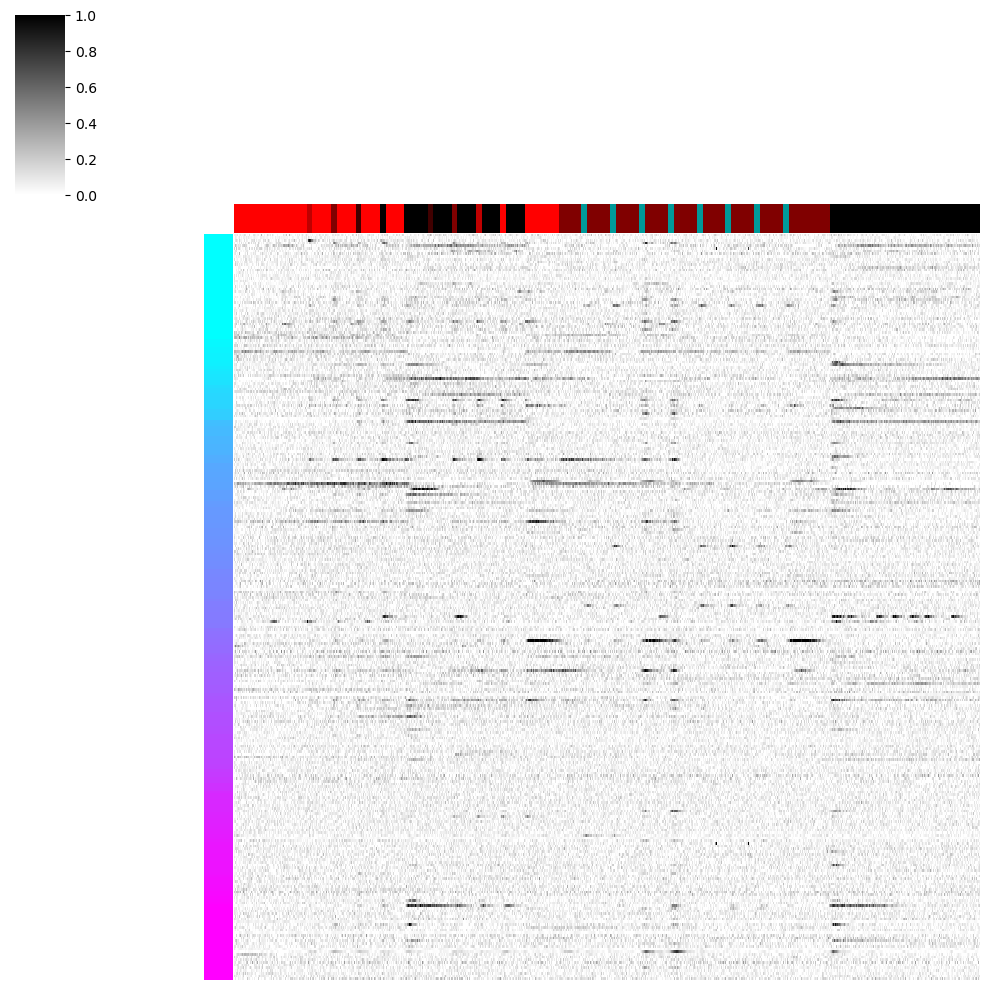

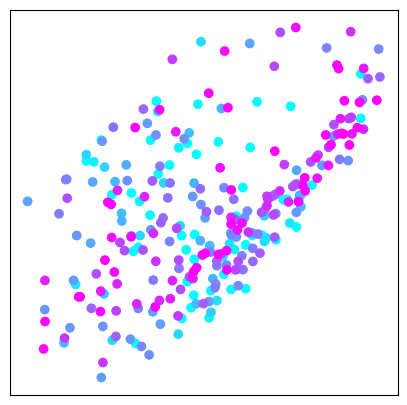

Critical r for n=276, alpha=0.05: 0.1181


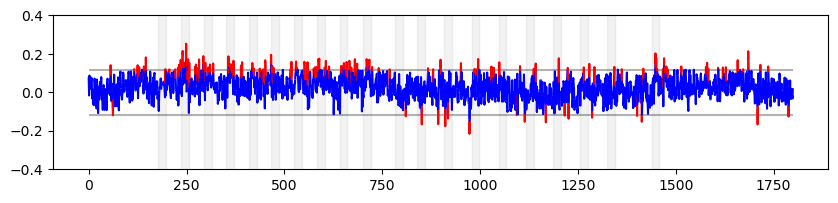

[0, 92, 184] [91, 183, 275]
(1800, 91)


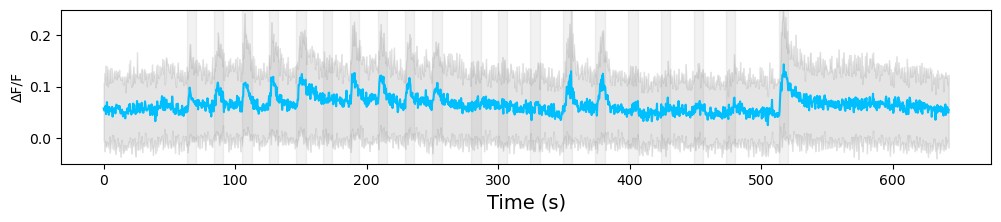

(1800, 91)


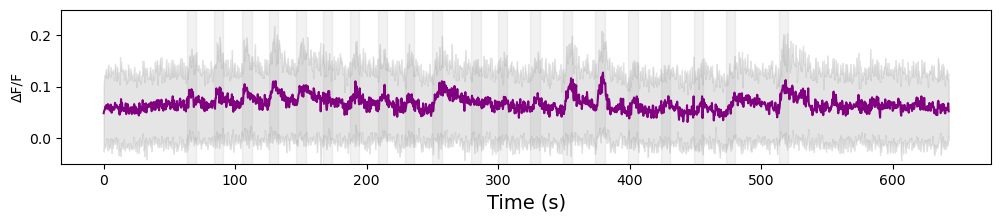

(1800, 91)


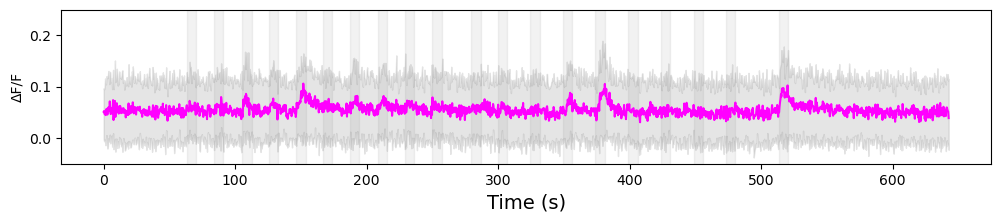

(0.1, 0.6)


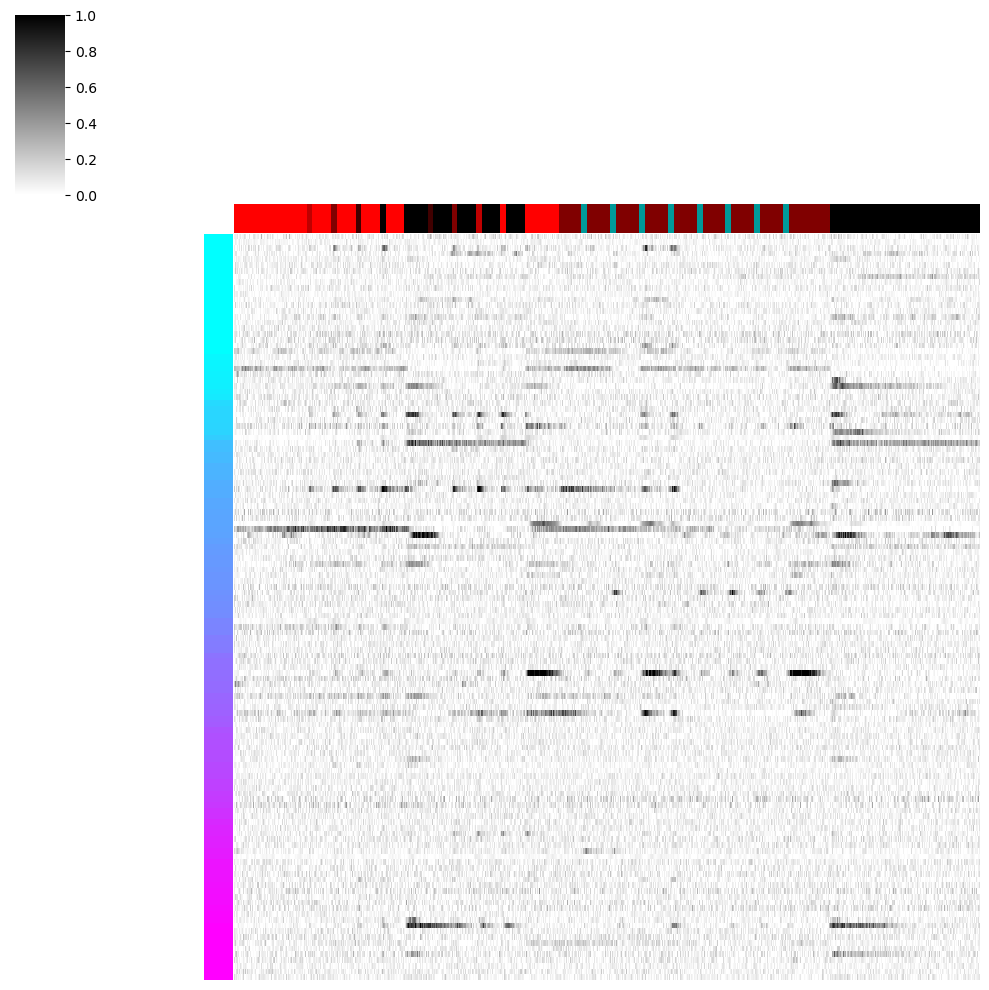

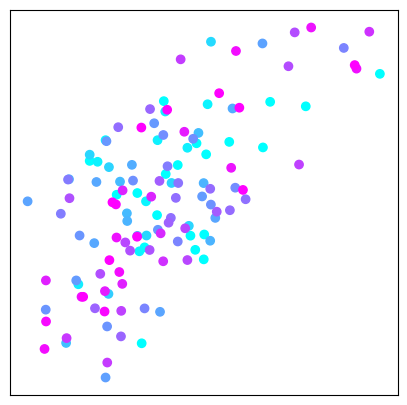

Critical r for n=130, alpha=0.05: 0.1723


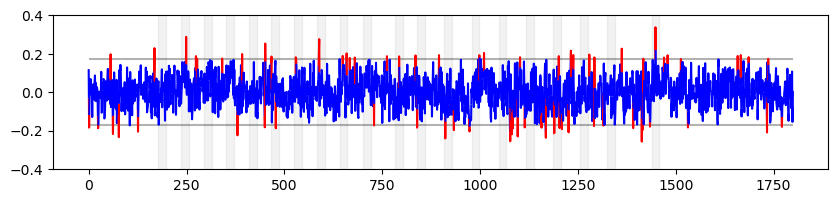

[0, 43, 86] [42, 85, 128]
(1800, 42)


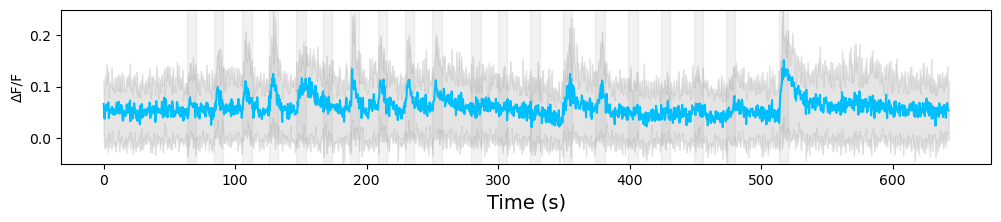

(1800, 42)


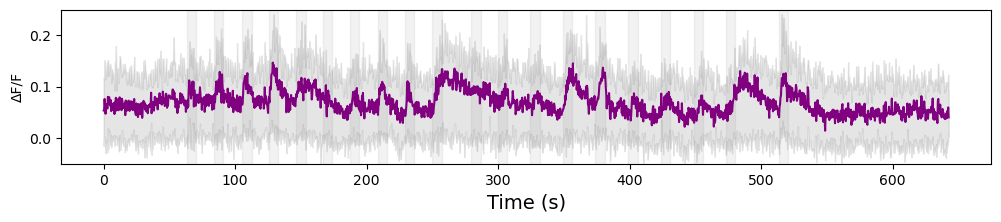

(1800, 42)


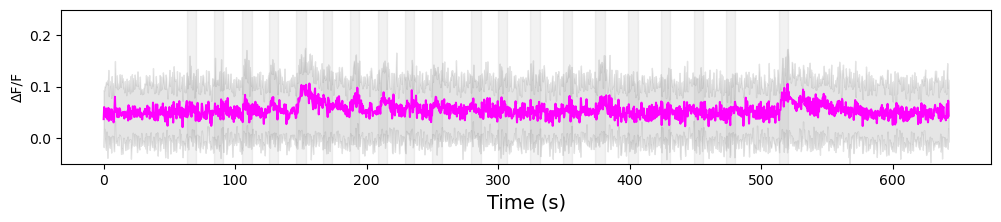

(0.1, 0.6)


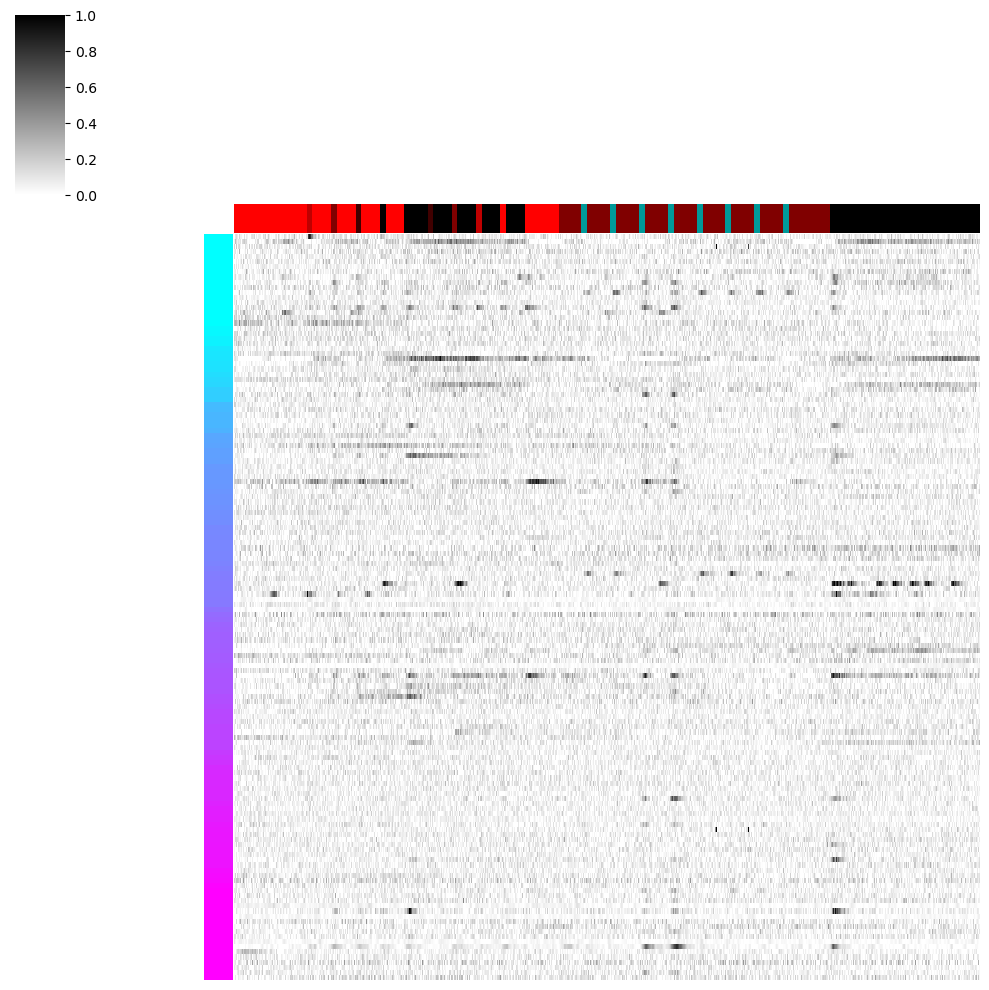

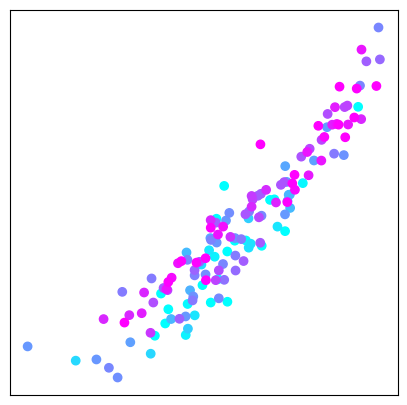

Critical r for n=146, alpha=0.05: 0.1625


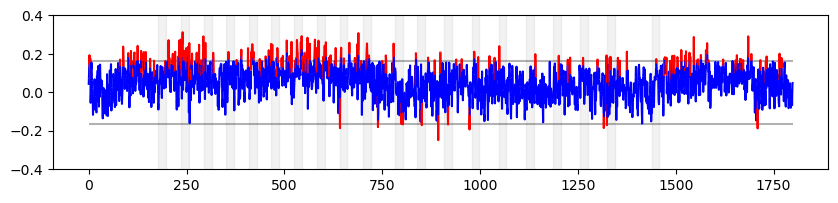

[0, 48, 96] [47, 95, 143]
(1800, 47)


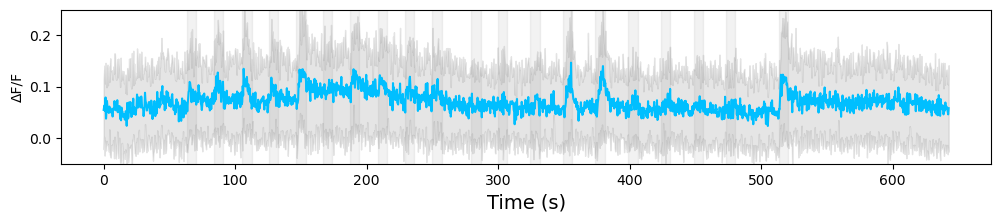

(1800, 47)


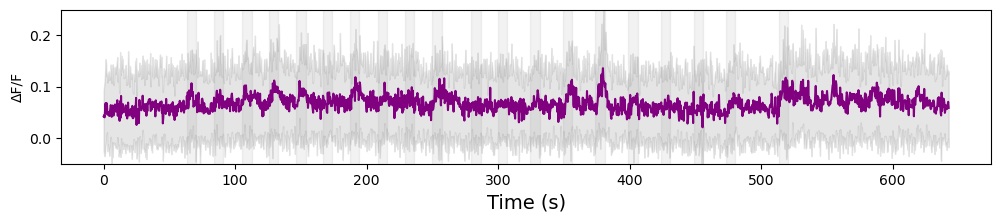

(1800, 47)


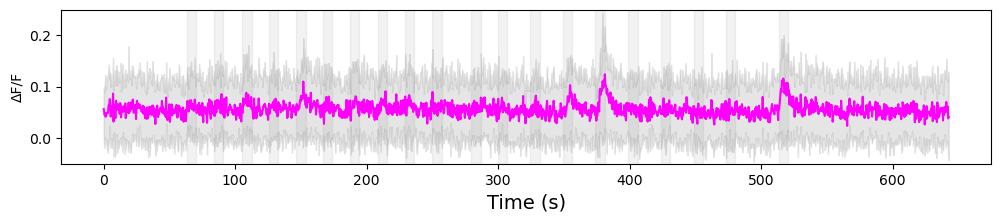

In [28]:


D1 = allData_merged[allData_merged["l_distance"] >-1000]
D2 = allData_merged[allData_merged["l_distance"] >15]
D3= allData_merged[allData_merged["l_distance"] <15]

for SINData_merged, name in zip([D1,D2,D3], ["All", "DIN", "SIN"]):

    if name not in os.listdir("../Figures/sin_functional/"):
        os.mkdir("../Figures/sin_functional/"+name)


    lower_bound = 0.1#np.quantile(SINData_merged["ratio_Neuron"],0.05)
    upper_bound = 0.6#np.quantile(SINData_merged["ratio_Neuron"],0.95)
    print((lower_bound,upper_bound))
    temp_ratio = (SINData_merged["ratio_Neuron"]-lower_bound)/(upper_bound-lower_bound)
        
    colors = [cools(value) for value in temp_ratio]
    
    Plot = sns.clustermap(All_traces_merged[list(SINData_merged["fish_Neuron"])].transpose(),
                          cmap = "gray_r",
                          row_colors = colors,
                          col_colors = Brightness,
                          col_cluster = False, row_cluster = False,
                          vmin=0, vmax=1,
                          yticklabels=False,xticklabels=False,
                          figsize = (10,10))
    plt.show()
    
    plt.figure( figsize = (5,5))
    plt.scatter(data = SINData_merged, x = "normx", y = "normy", c ="ratio_Neuron",
                cmap = "cool_r", vmin = lower_bound, vmax = upper_bound)
    plt.gca().invert_yaxis()
    plt.xticks([])
    plt.yticks([])
    plt.show()

    n = len(SINData_merged["fish_Neuron"])
    alpha = 0.05
    r_threshold = critical_r(n, alpha)
    print(f"Critical r for n={n}, alpha={alpha}: {r_threshold:.4f}")


    plt.figure(figsize = (10,2))
    
    plt.ylim(-0.4,0.4)
    
    plt.hlines([r_threshold, -r_threshold],0,1800, color = "black", alpha = 0.3)
    
    a = All_traces_merged[list(SINData_merged["fish_Neuron"])].apply(spearman, args = [SINData_merged["ratio_Neuron"]], axis=1)
    significant = All_traces_merged[list(SINData_merged["fish_Neuron"])].apply(spearman, args = [SINData_merged["ratio_Neuron"], False], axis=1)>0.05
    
    color = ["r" if x else "b" for x in significant]
    
    diff = 20
    ax = plt.gcf().gca()
    colored_line(range(0,1800),a,significant, ax,cmap='bwr_r')
    for x in stim_starts:
        rec = Rectangle((x,-1), diff, 2, color = "gray", alpha = 0.1)
        ax.add_patch(rec)
    
    
    plt.show()
    #--------------------------------------------------------------------------------------------------------------
    n_neurons = len(SINData_merged["fish_Neuron"])
    increment = int(np.floor(n_neurons/3))
    
    start = [increment*x for x in range(0,round(n_neurons/increment))]
    end = [increment-1+increment*x for x in range(0,round(n_neurons/increment))]
    k = ["mature","intermediate",#-mature", #"intermediate-immature",
         "immature"]
    color = ["deepskyblue", "purple", "magenta"]
    
    print(start, end)
    
    for i,j,name_2,colour in zip(start, end, k, color):
        plt.figure(figsize = (12,2))
        
        
    
        temp = All_traces_merged[list(SINData_merged["fish_Neuron"])[i:j]].mean(axis = 1)
        sd = All_traces_merged[list(SINData_merged["fish_Neuron"])[i:j]].std(axis = 1)
        print(All_traces_merged[list(SINData_merged["fish_Neuron"])[i:j]].shape)
              
        plt.plot(temp,
            color = colour
        )
        
        plt.fill_between(
        range(0,1800), 
        All_traces_merged[list(SINData_merged["fish_Neuron"])[i:j]].quantile(0.84, axis = 1), 
        All_traces_merged[list(SINData_merged["fish_Neuron"])[i:j]].quantile(0.16, axis = 1), 
        color="gray", alpha=.2)
        
        fig = plt.gcf()
        ax = fig.gca()
        diff = 20
        for x in stim_starts:
            rec = Rectangle((x,-1), diff, 2, color = "gray", alpha = 0.1)
            ax.add_patch(rec)
    
        for x in range(0,1800,3):
            
            rec = Rectangle((x,.35), 3, 0.01, color = Brightness[x], alpha = 1)
            ax.add_patch(rec)
    
        
        plt.ylim(-0.05,0.25)
        plt.xlabel("Time (s)", size =14)
        plt.ylabel("ΔF/F")
        timesstamps = [0, 100,200,300,400,500, 600]
        ts_position = [x*2.8 for x in timesstamps]
        plt.xticks(ts_position, timesstamps)

        plt.savefig("../Figures/sin_functional/"+name+"/avg_trace_"+name_2+".svg")
        plt.show()
    